## Long Short-Term Memory 

In this assignment, we will learn about LSTM models. We will create an LSTM model for time series prediction.

In [2]:
import numpy as np
import os
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Below is a function for loading time series data collected by sensors. There are 9 different files, We have data about body acceleration, body gyro, and total acceleration for the x, y, and z axis

In [4]:
def load_func(path, file_ind=False):
    data_list = []
    if file_ind:
        filenames = [path]
    else:
        files = os.listdir(path)
        filenames = [path + '/' + f for f in files]
    for f in filenames:
        dataframe = pd.read_csv(f, header=None, delim_whitespace=True)
        data_list.append(dataframe.values)
    if len(data_list) > 1:
        return np.dstack(data_list)
    else:
        return data_list[0]

In [5]:
os.listdir('/content/drive/MyDrive/ConvolutionNeuralNetworks/UCI HAR Dataset/train/Inertial Signals/')

['body_acc_x_train.txt',
 'body_acc_y_train.txt',
 'body_acc_z_train.txt',
 'total_acc_y_train.txt',
 'total_acc_x_train.txt',
 'total_acc_z_train.txt',
 'body_gyro_x_train.txt',
 'body_gyro_y_train.txt',
 'body_gyro_z_train.txt']

In [6]:
X_train = load_func("/content/drive/MyDrive/ConvolutionNeuralNetworks/UCI HAR Dataset/train/Inertial Signals")
X_test = load_func("/content/drive/MyDrive/ConvolutionNeuralNetworks/UCI HAR Dataset/test/Inertial Signals")
y_train_cat = load_func('/content/drive/MyDrive/ConvolutionNeuralNetworks/UCI HAR Dataset/train/y_train.txt', True)
y_test_cat = load_func('/content/drive/MyDrive/ConvolutionNeuralNetworks/UCI HAR Dataset/test/y_test.txt', True)

Print the dimensions of both the predictor variables and the target.

In [7]:
# Answer below:
print(X_train.shape)
print(y_train_cat.shape)

(7352, 128, 9)
(7352, 1)


In [8]:
y_train_cat

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]])

The target variable is categorical. One hot encode the target variable.

In [9]:
df = pd.DataFrame(y_test_cat)
y_test_cat = df[0]
y_test_cat = pd.get_dummies(y_test_cat)
y_test_cat.shape

(2947, 6)

In [10]:
# Answer below:
df = pd.DataFrame(y_train_cat)
y_train_cat = df[0]
y_train_cat = pd.get_dummies(y_train_cat)
y_train_cat

,1,2,3,4,5,6
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
7347,0,1,0,0,0,0
7348,0,1,0,0,0,0
7349,0,1,0,0,0,0
7350,0,1,0,0,0,0


Create a model containing an LSTM layer with unit size 100, and input shape that is the tuple containing the number of columns in X and the number of files in X.

The next layer is a dropout layer. Choose 0.5 for the proportion. Then add a dense layer of unit size 100 and finally an output dense layer. 

In [11]:
# Answer below:
model = Sequential()
model.add(LSTM(100, input_shape=(128,9)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))


Print the model summary to ensure you have the correct number of parameters.

In [12]:
# Answer below:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               44000     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 54,706
Trainable params: 54,706
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model. Select the appropriate activation, loss, and optimizer.

Run the model for 10 epochs with a batch size of 80.

In [13]:
# Answer below:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), batch_size=80, epochs=50)


Epoch 1/50
92/92 [==============================] - 9s 17ms/step - loss: 1.4750 - accuracy: 0.3842 - val_loss: 6.8058 - val_accuracy: 0.0675
Epoch 2/50
92/92 [==============================] - 1s 10ms/step - loss: 1.1133 - accuracy: 0.5230 - val_loss: 7.4514 - val_accuracy: 0.0675
Epoch 3/50
92/92 [==============================] - 1s 10ms/step - loss: 0.7774 - accuracy: 0.6775 - val_loss: 8.8171 - val_accuracy: 0.0580
Epoch 4/50
92/92 [==============================] - 1s 10ms/step - loss: 0.6339 - accuracy: 0.7526 - val_loss: 8.7956 - val_accuracy: 0.0763
Epoch 5/50
92/92 [==============================] - 1s 10ms/step - loss: 0.5371 - accuracy: 0.7977 - val_loss: 10.5967 - val_accuracy: 0.0774
Epoch 6/50
92/92 [==============================] - 1s 10ms/step - loss: 0.4007 - accuracy: 0.8587 - val_loss: 9.6644 - val_accuracy: 0.0590
Epoch 7/50
92/92 [==============================] - 1s 10ms/step - loss: 0.2692 - accuracy: 0.9099 - val_loss: 10.9079 - val_accuracy: 0.0794
Epoch 8/50


Print the confusion matrix for the test data.

In [14]:
# Answer below:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test_cat = load_func('/content/drive/MyDrive/ConvolutionNeuralNetworks/UCI HAR Dataset/test/y_test.txt', True)
cm = confusion_matrix(y_test_cat-1, y_pred)

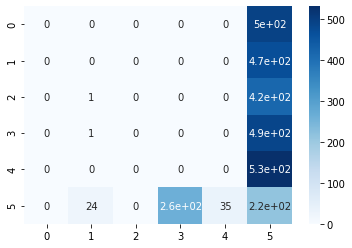

In [15]:
sns.heatmap(cm, annot=True, cmap='Blues')